In [9]:
import pandas as pd
import numpy as np

stocks = pd.read_csv("data/stocks_ti.csv")

import warnings

warnings.filterwarnings("ignore")

In [10]:
from utils import prep_classifier_data, feature_type_map

fm = feature_type_map(stocks)
columns1 = list(set(fm["spy_returns"]))
columns2 = list(set(fm["returns"]))
columns3 = list(set(fm["returns"] + fm["sentiment"]))
columns4 = list(set(fm["returns"] + fm["technical"]))
columns5 = stocks.columns

# dictionary to store tuple of (pred, confusion_matrix, classifier) for each day, for each feature type, for each model
models_key = {
    "logistic_regression": {
        "spy_returns": {1: None, 5: None, 13: None, 21: None},
        "sector_returns": {1: None, 5: None, 13: None, 21: None},
        "sector_returns_sentiment": {1: None, 5: None, 13: None, 21: None},
        "sector_returns_technical": {1: None, 5: None, 13: None, 21: None},
        "all_features": {1: None, 5: None, 13: None, 21: None},
    },
    "random_forest": {
        "spy_returns": {1: None, 5: None, 13: None, 21: None},
        "sector_returns": {1: None, 5: None, 13: None, 21: None},
        "sector_returns_sentiment": {1: None, 5: None, 13: None, 21: None},
        "sector_returns_technical": {1: None, 5: None, 13: None, 21: None},
        "all_features": {1: None, 5: None, 13: None, 21: None},
    },
    "xgboost": {
        "spy_returns": {1: None, 5: None, 13: None, 21: None},
        "sector_returns": {1: None, 5: None, 13: None, 21: None},
        "sector_returns_sentiment": {1: None, 5: None, 13: None, 21: None},
        "sector_returns_technical": {1: None, 5: None, 13: None, 21: None},
        "all_features": {1: None, 5: None, 13: None, 21: None},
    },
}

# loop through each day and each feature type
for i, day_no in enumerate([1, 5, 13, 21]):
    for j, features in enumerate([columns1, columns2, columns3, columns4, columns5]):
        features_type = [
            "spy_returns",
            "sector_returns",
            "sector_returns_sentiment",
            "sector_returns_technical",
            "all_features",
        ][j]

        # prep data
        X_train, X_test, y_train, y_test = prep_classifier_data(
            stocks[features].copy(), day_no
        )

        ## models
        from utils import (
            logistic_regression,
            random_forest_classifier,
            xgboost_classifier,
        )

        # logistic regression
        print(f"Logistic Regression on {day_no} day(s) with {features_type}...")
        models_key["logistic_regression"][features_type][day_no] = logistic_regression(
            X_train, X_test, y_train, y_test
        )

        # random forest
        print(f"Random Forest on {day_no} day(s) with {features_type}...")
        models_key["random_forest"][features_type][day_no] = random_forest_classifier(
            X_train, X_test, y_train, y_test
        )

        # xgboost
        print(f"XGBoost on {day_no} day(s) with {features_type}...")
        models_key["xgboost"][features_type][day_no] = xgboost_classifier(
            X_train, X_test, y_train, y_test
        )

Logistic Regression on 1 day(s) with spy_returns...
Accuracy: 0.54800
Random Forest on 1 day(s) with spy_returns...
Fitting 3 folds for each of 60 candidates, totalling 180 fits


/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

Accuracy: 0.53200
XGBoost on 1 day(s) with spy_returns...
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Accuracy: 0.50800
Logistic Regression on 1 day(s) with sector_returns...
Accuracy: 0.47600
Random Forest on 1 day(s) with sector_returns...
Fitting 3 folds for each of 60 candidates, totalling 180 fits


/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

Accuracy: 0.50400
XGBoost on 1 day(s) with sector_returns...
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Accuracy: 0.49600
Logistic Regression on 1 day(s) with sector_returns_sentiment...
Accuracy: 0.48800
Random Forest on 1 day(s) with sector_returns_sentiment...
Fitting 3 folds for each of 60 candidates, totalling 180 fits


/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

Accuracy: 0.50800
XGBoost on 1 day(s) with sector_returns_sentiment...
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Accuracy: 0.49200
Logistic Regression on 1 day(s) with sector_returns_technical...
Accuracy: 0.46988
Random Forest on 1 day(s) with sector_returns_technical...
Fitting 3 folds for each of 60 candidates, totalling 180 fits


/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

Accuracy: 0.46185
XGBoost on 1 day(s) with sector_returns_technical...
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Accuracy: 0.44177
Logistic Regression on 1 day(s) with all_features...
Accuracy: 0.44578
Random Forest on 1 day(s) with all_features...
Fitting 3 folds for each of 60 candidates, totalling 180 fits


/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

Accuracy: 0.49398
XGBoost on 1 day(s) with all_features...
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Accuracy: 0.42972
Logistic Regression on 5 day(s) with spy_returns...
Accuracy: 0.65600
Random Forest on 5 day(s) with spy_returns...
Fitting 3 folds for each of 60 candidates, totalling 180 fits


/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

Accuracy: 0.61200
XGBoost on 5 day(s) with spy_returns...
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Accuracy: 0.64800
Logistic Regression on 5 day(s) with sector_returns...
Accuracy: 0.57600
Random Forest on 5 day(s) with sector_returns...
Fitting 3 folds for each of 60 candidates, totalling 180 fits


/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

Accuracy: 0.59200
XGBoost on 5 day(s) with sector_returns...
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Accuracy: 0.47600
Logistic Regression on 5 day(s) with sector_returns_sentiment...
Accuracy: 0.60000
Random Forest on 5 day(s) with sector_returns_sentiment...
Fitting 3 folds for each of 60 candidates, totalling 180 fits


/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

Accuracy: 0.57600
XGBoost on 5 day(s) with sector_returns_sentiment...
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Accuracy: 0.49200
Logistic Regression on 5 day(s) with sector_returns_technical...
Accuracy: 0.49799
Random Forest on 5 day(s) with sector_returns_technical...
Fitting 3 folds for each of 60 candidates, totalling 180 fits


/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

Accuracy: 0.53414
XGBoost on 5 day(s) with sector_returns_technical...
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Accuracy: 0.38554
Logistic Regression on 5 day(s) with all_features...
Accuracy: 0.51406
Random Forest on 5 day(s) with all_features...
Fitting 3 folds for each of 60 candidates, totalling 180 fits


/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

Accuracy: 0.58233
XGBoost on 5 day(s) with all_features...
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Accuracy: 0.46988
Logistic Regression on 13 day(s) with spy_returns...
Accuracy: 0.66800
Random Forest on 13 day(s) with spy_returns...
Fitting 3 folds for each of 60 candidates, totalling 180 fits


/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

Accuracy: 0.65200
XGBoost on 13 day(s) with spy_returns...
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Accuracy: 0.66800
Logistic Regression on 13 day(s) with sector_returns...
Accuracy: 0.54400
Random Forest on 13 day(s) with sector_returns...
Fitting 3 folds for each of 60 candidates, totalling 180 fits


/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

Accuracy: 0.62800
XGBoost on 13 day(s) with sector_returns...
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Accuracy: 0.50800
Logistic Regression on 13 day(s) with sector_returns_sentiment...
Accuracy: 0.54000
Random Forest on 13 day(s) with sector_returns_sentiment...
Fitting 3 folds for each of 60 candidates, totalling 180 fits


/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

Accuracy: 0.62000
XGBoost on 13 day(s) with sector_returns_sentiment...
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Accuracy: 0.52800
Logistic Regression on 13 day(s) with sector_returns_technical...
Accuracy: 0.36948
Random Forest on 13 day(s) with sector_returns_technical...
Fitting 3 folds for each of 60 candidates, totalling 180 fits


/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

Accuracy: 0.61446
XGBoost on 13 day(s) with sector_returns_technical...
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Accuracy: 0.58233
Logistic Regression on 13 day(s) with all_features...
Accuracy: 0.36948
Random Forest on 13 day(s) with all_features...
Fitting 3 folds for each of 60 candidates, totalling 180 fits


/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

Accuracy: 0.61044
XGBoost on 13 day(s) with all_features...
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Accuracy: 0.54217
Logistic Regression on 21 day(s) with spy_returns...
Accuracy: 0.67600
Random Forest on 21 day(s) with spy_returns...
Fitting 3 folds for each of 60 candidates, totalling 180 fits


/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

Accuracy: 0.67600
XGBoost on 21 day(s) with spy_returns...
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Accuracy: 0.68000
Logistic Regression on 21 day(s) with sector_returns...
Accuracy: 0.50000
Random Forest on 21 day(s) with sector_returns...
Fitting 3 folds for each of 60 candidates, totalling 180 fits


/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

Accuracy: 0.48400
XGBoost on 21 day(s) with sector_returns...
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Accuracy: 0.49200
Logistic Regression on 21 day(s) with sector_returns_sentiment...
Accuracy: 0.48400
Random Forest on 21 day(s) with sector_returns_sentiment...
Fitting 3 folds for each of 60 candidates, totalling 180 fits


/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

Accuracy: 0.48800
XGBoost on 21 day(s) with sector_returns_sentiment...
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Accuracy: 0.48400
Logistic Regression on 21 day(s) with sector_returns_technical...
Accuracy: 0.51406
Random Forest on 21 day(s) with sector_returns_technical...
Fitting 3 folds for each of 60 candidates, totalling 180 fits


/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

Accuracy: 0.55422
XGBoost on 21 day(s) with sector_returns_technical...
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Accuracy: 0.57430
Logistic Regression on 21 day(s) with all_features...
Accuracy: 0.49799
Random Forest on 21 day(s) with all_features...
Fitting 3 folds for each of 60 candidates, totalling 180 fits


/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rao/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

Accuracy: 0.53815
XGBoost on 21 day(s) with all_features...
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Accuracy: 0.62651


| Prediction Window | Features                   | Model             | Accuracy |
|--------------------|----------------------------|-------------------|----------|
| 1 day              | SPY Returns                | Logistic Regression | 0.54800  |
| 1 day              | SPY Returns                | Random Forest       | 0.51600  |
| 1 day              | SPY Returns                | XGBoost             | 0.54400  |
| 1 day              | Sector Returns             | Logistic Regression | 0.47600  |
| 1 day              | Sector Returns             | Random Forest       | 0.53200  |
| 1 day              | Sector Returns             | XGBoost             | 0.49200  |
| 1 day              | Sector Returns Sentiment   | Logistic Regression | 0.48800  |
| 1 day              | Sector Returns Sentiment   | Random Forest       | 0.49600  |
| 1 day              | Sector Returns Sentiment   | XGBoost             | 0.48800  |
| 1 day              | Sector Returns Technical   | Logistic Regression | 0.46988  |
| 1 day              | Sector Returns Technical   | Random Forest       | 0.50602  |
| 1 day              | Sector Returns Technical   | XGBoost             | 0.42570  |
| 1 day              | All Features               | Logistic Regression | 0.44578  |
| 1 day              | All Features               | Random Forest       | 0.49398  |
| 1 day              | All Features               | XGBoost             | 0.44980  |
| 5 days             | SPY Returns                | Logistic Regression | 0.65600  |
| 5 days             | SPY Returns                | Random Forest       | 0.62000  |
| 5 days             | SPY Returns                | XGBoost             | 0.62800  |
| 5 days             | Sector Returns             | Logistic Regression | 0.57600  |
| 5 days             | Sector Returns             | Random Forest       | 0.59600  |
| 5 days             | Sector Returns             | XGBoost             | 0.51200  |
| 5 days             | Sector Returns Sentiment   | Logistic Regression | 0.60000  |
| 5 days             | Sector Returns Sentiment   | Random Forest       | 0.58400  |
| 5 days             | Sector Returns Sentiment   | XGBoost             | 0.49600  |
| 5 days             | Sector Returns Technical   | Logistic Regression | 0.49799  |
| 5 days             | Sector Returns Technical   | Random Forest       | 0.56627  |
| 5 days             | Sector Returns Technical   | XGBoost             | 0.45382  |
| 5 days             | All Features               | Logistic Regression | 0.51406  |
| 5 days             | All Features               | Random Forest       | 0.58233  |
| 5 days             | All Features               | XGBoost             | 0.47390  |
| 13 days            | SPY Returns                | Logistic Regression | 0.66800  |
| 13 days            | SPY Returns                | Random Forest       | 0.66000  |
| 13 days            | SPY Returns                | XGBoost             | 0.66800  |
| 13 days            | Sector Returns             | Logistic Regression | 0.54400  |
| 13 days            | Sector Returns             | Random Forest       | 0.62000  |
| 13 days            | Sector Returns             | XGBoost             | 0.52800  |
| 13 days            | Sector Returns Sentiment   | Logistic Regression | 0.54000  |
| 13 days            | Sector Returns Sentiment   | Random Forest       | 0.62800  |
| 13 days            | Sector Returns Sentiment   | XGBoost             | 0.50800  |
| 13 days            | Sector Returns Technical   | Logistic Regression | 0.36948  |
| 13 days            | Sector Returns Technical   | Random Forest       | 0.61847  |
| 13 days            | Sector Returns Technical   | XGBoost             | 0.59036  |
| 13 days            | All Features               | Logistic Regression | 0.36948  |
| 13 days            | All Features               | Random Forest       | 0.61044  |
| 13 days            | All Features               | XGBoost             | 0.57028  |
| 21 days            | SPY Returns                | Logistic Regression | 0.67600  |
| 21 days            | SPY Returns                | Random Forest       | 0.67600  |
| 21 days            | SPY Returns                | XGBoost             | 0.67600  |
| 21 days            | Sector Returns             | Logistic Regression | 0.50000  |
| 21 days            | Sector Returns             | Random Forest       | 0.49200  |
| 21 days            | Sector Returns             | XGBoost             | 0.50000  |
| 21 days            | Sector Returns Sentiment   | Logistic Regression | 0.48400  |
| 21 days            | Sector Returns Sentiment   | Random Forest       | 0.48400  |
| 21 days            | Sector Returns Sentiment   | XGBoost             | 0.48000  |
| 21 days            | Sector Returns Technical   | Logistic Regression | 0.51406  |
| 21 days            | Sector Returns Technical   | Random Forest       | 0.54217  |
| 21 days            | Sector Returns Technical   | XGBoost             | 0.56225  |
| 21 days            | All Features               | Logistic Regression | 0.49799  |
| 21 days            | All Features               | Random Forest       | 0.54618  |
| 21 days            | All Features               | XGBoost             | 0.57430  |


In [20]:
import pickle

with open("models_key.pkl", "wb") as file:
    pickle.dump(models_key, file)

In [21]:
# Open the pickle file and load the data
with open("models_key.pkl", "rb") as file:
    models_key = pickle.load(file)

# Now models_key is available as a dictionary
print(models_key)

{'logistic_regression': {'spy_returns': {1: (array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1]), array([[ 33,  70],
       [ 43, 104]]), LogisticRegression(random_state=257)), 5: (array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0,

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


def plot_all_confusion_matrices(feature_types_dict, title):
    fig, axes = plt.subplots(5, 4, figsize=(15, 20))  # Adjust subplot grid if needed
    fig.suptitle(title, fontsize=16)

    # Iterate over the dictionary items
    for i, (feature_type, days_dict) in enumerate(feature_types_dict.items()):
        for j, (days, results) in enumerate(days_dict.items()):
            if results is not None:
                cm = results[
                    1
                ]  # Assuming results is a tuple and index 1 is the confusion matrix
                disp = ConfusionMatrixDisplay(
                    confusion_matrix=cm,
                    display_labels=["down", "up"],  # Custom labels for the classes
                )
                disp.plot(
                    ax=axes[i, j], cmap="Blues", values_format=".0f", colorbar=False
                )
                axes[i, j].set_title(
                    f"Feature type: {feature_type} \n Predicting {days} day(s) return",
                    fontsize=10,
                )

    # Adjust layout to make room for the title
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

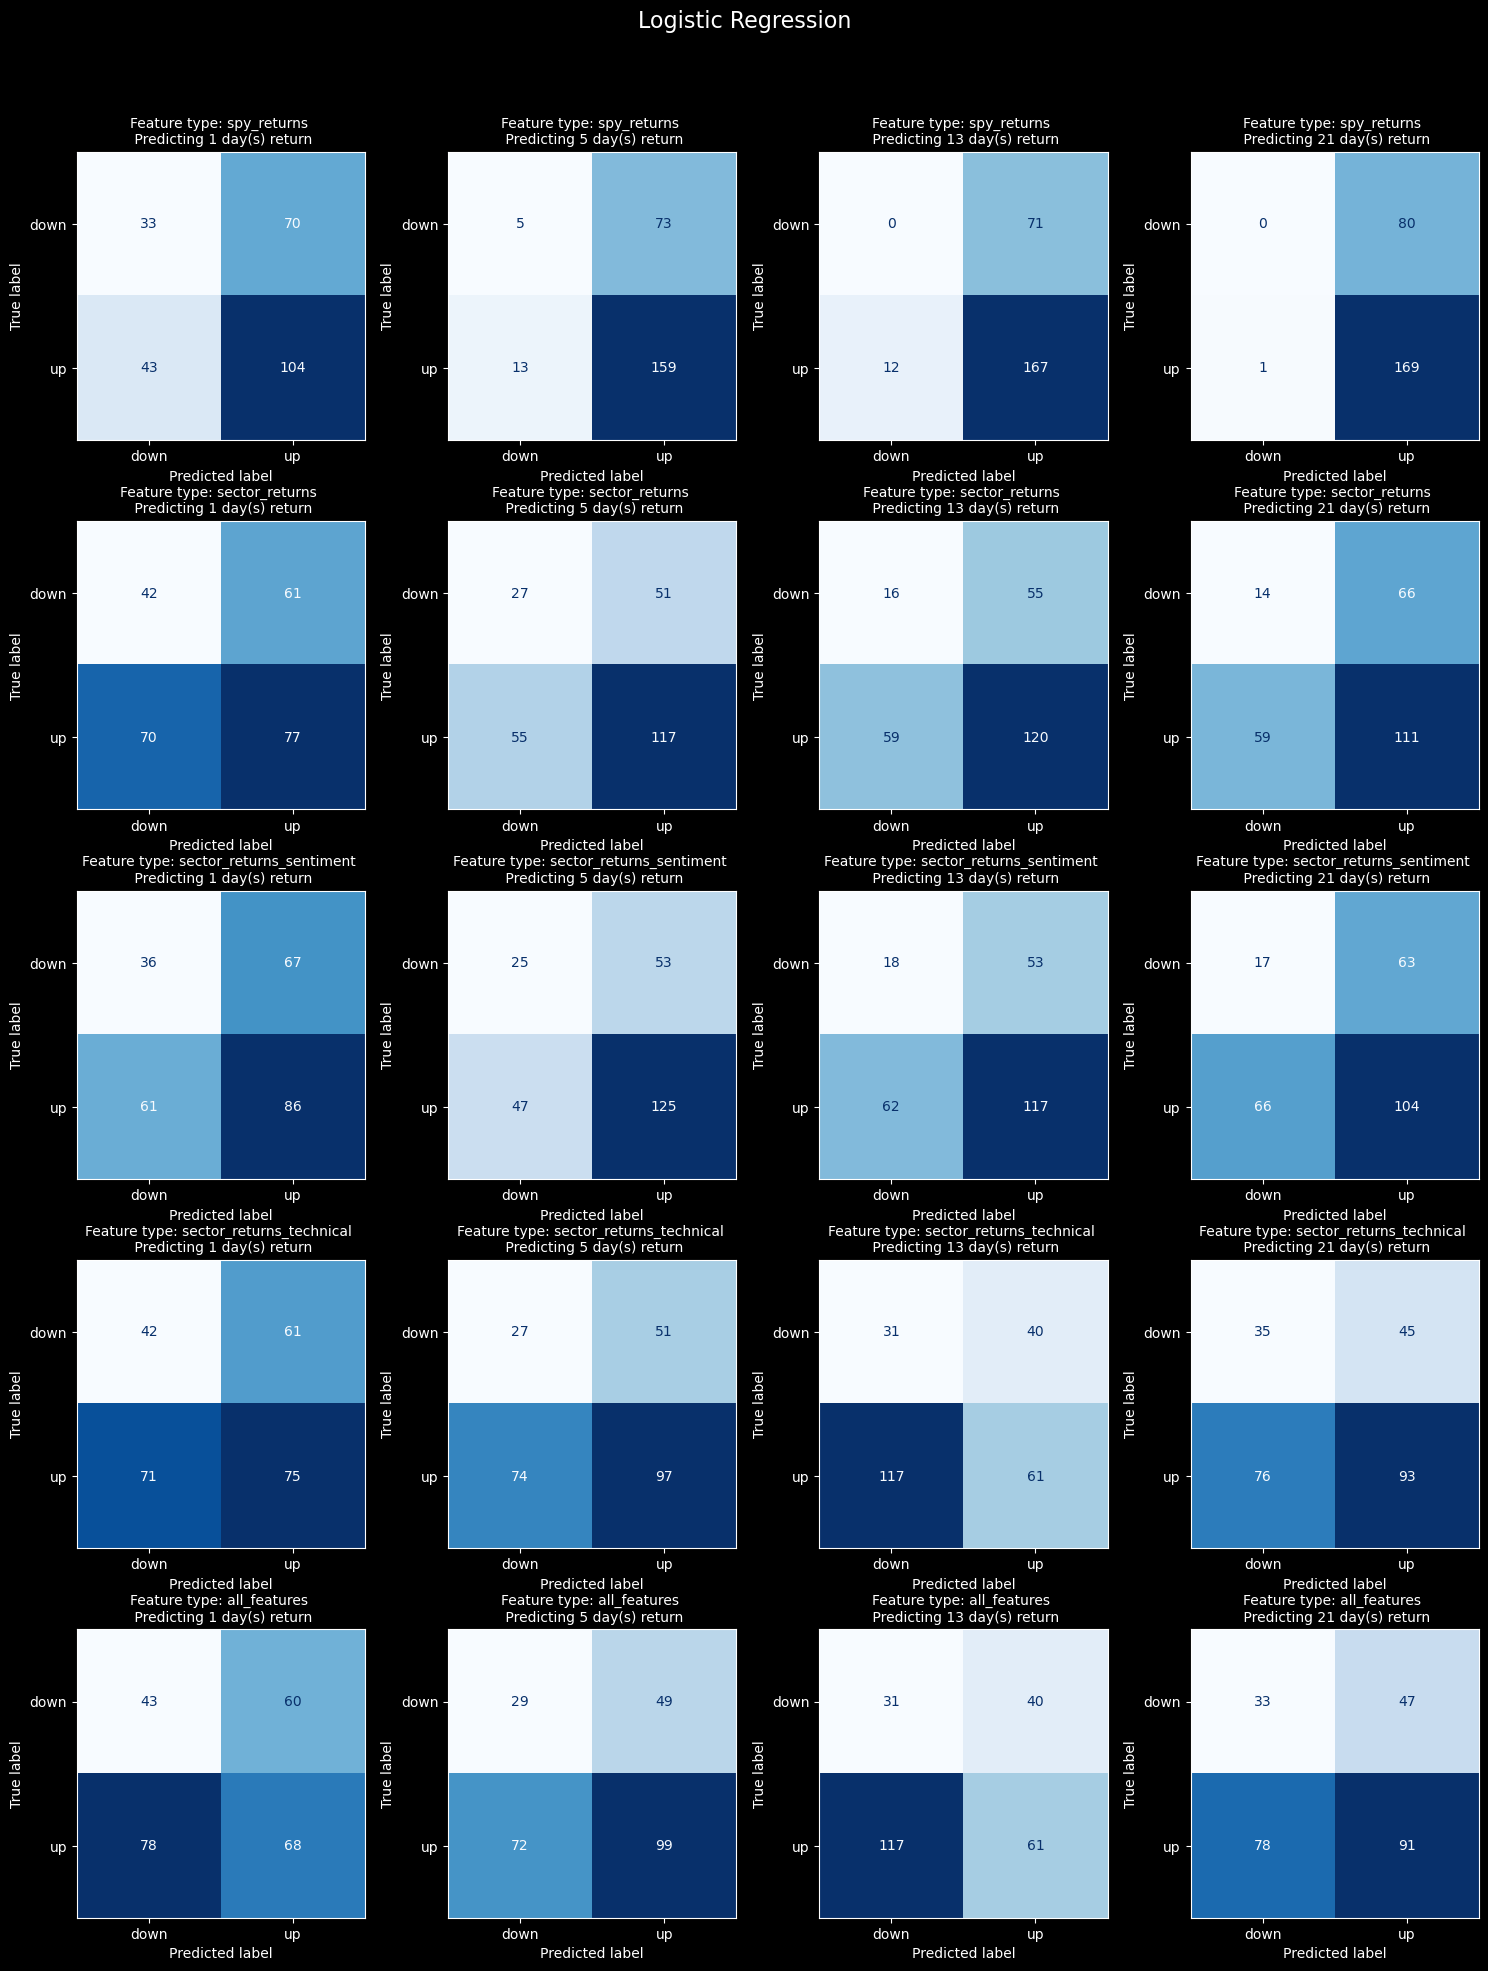

In [25]:
plot_all_confusion_matrices(models_key["logistic_regression"], "Logistic Regression")

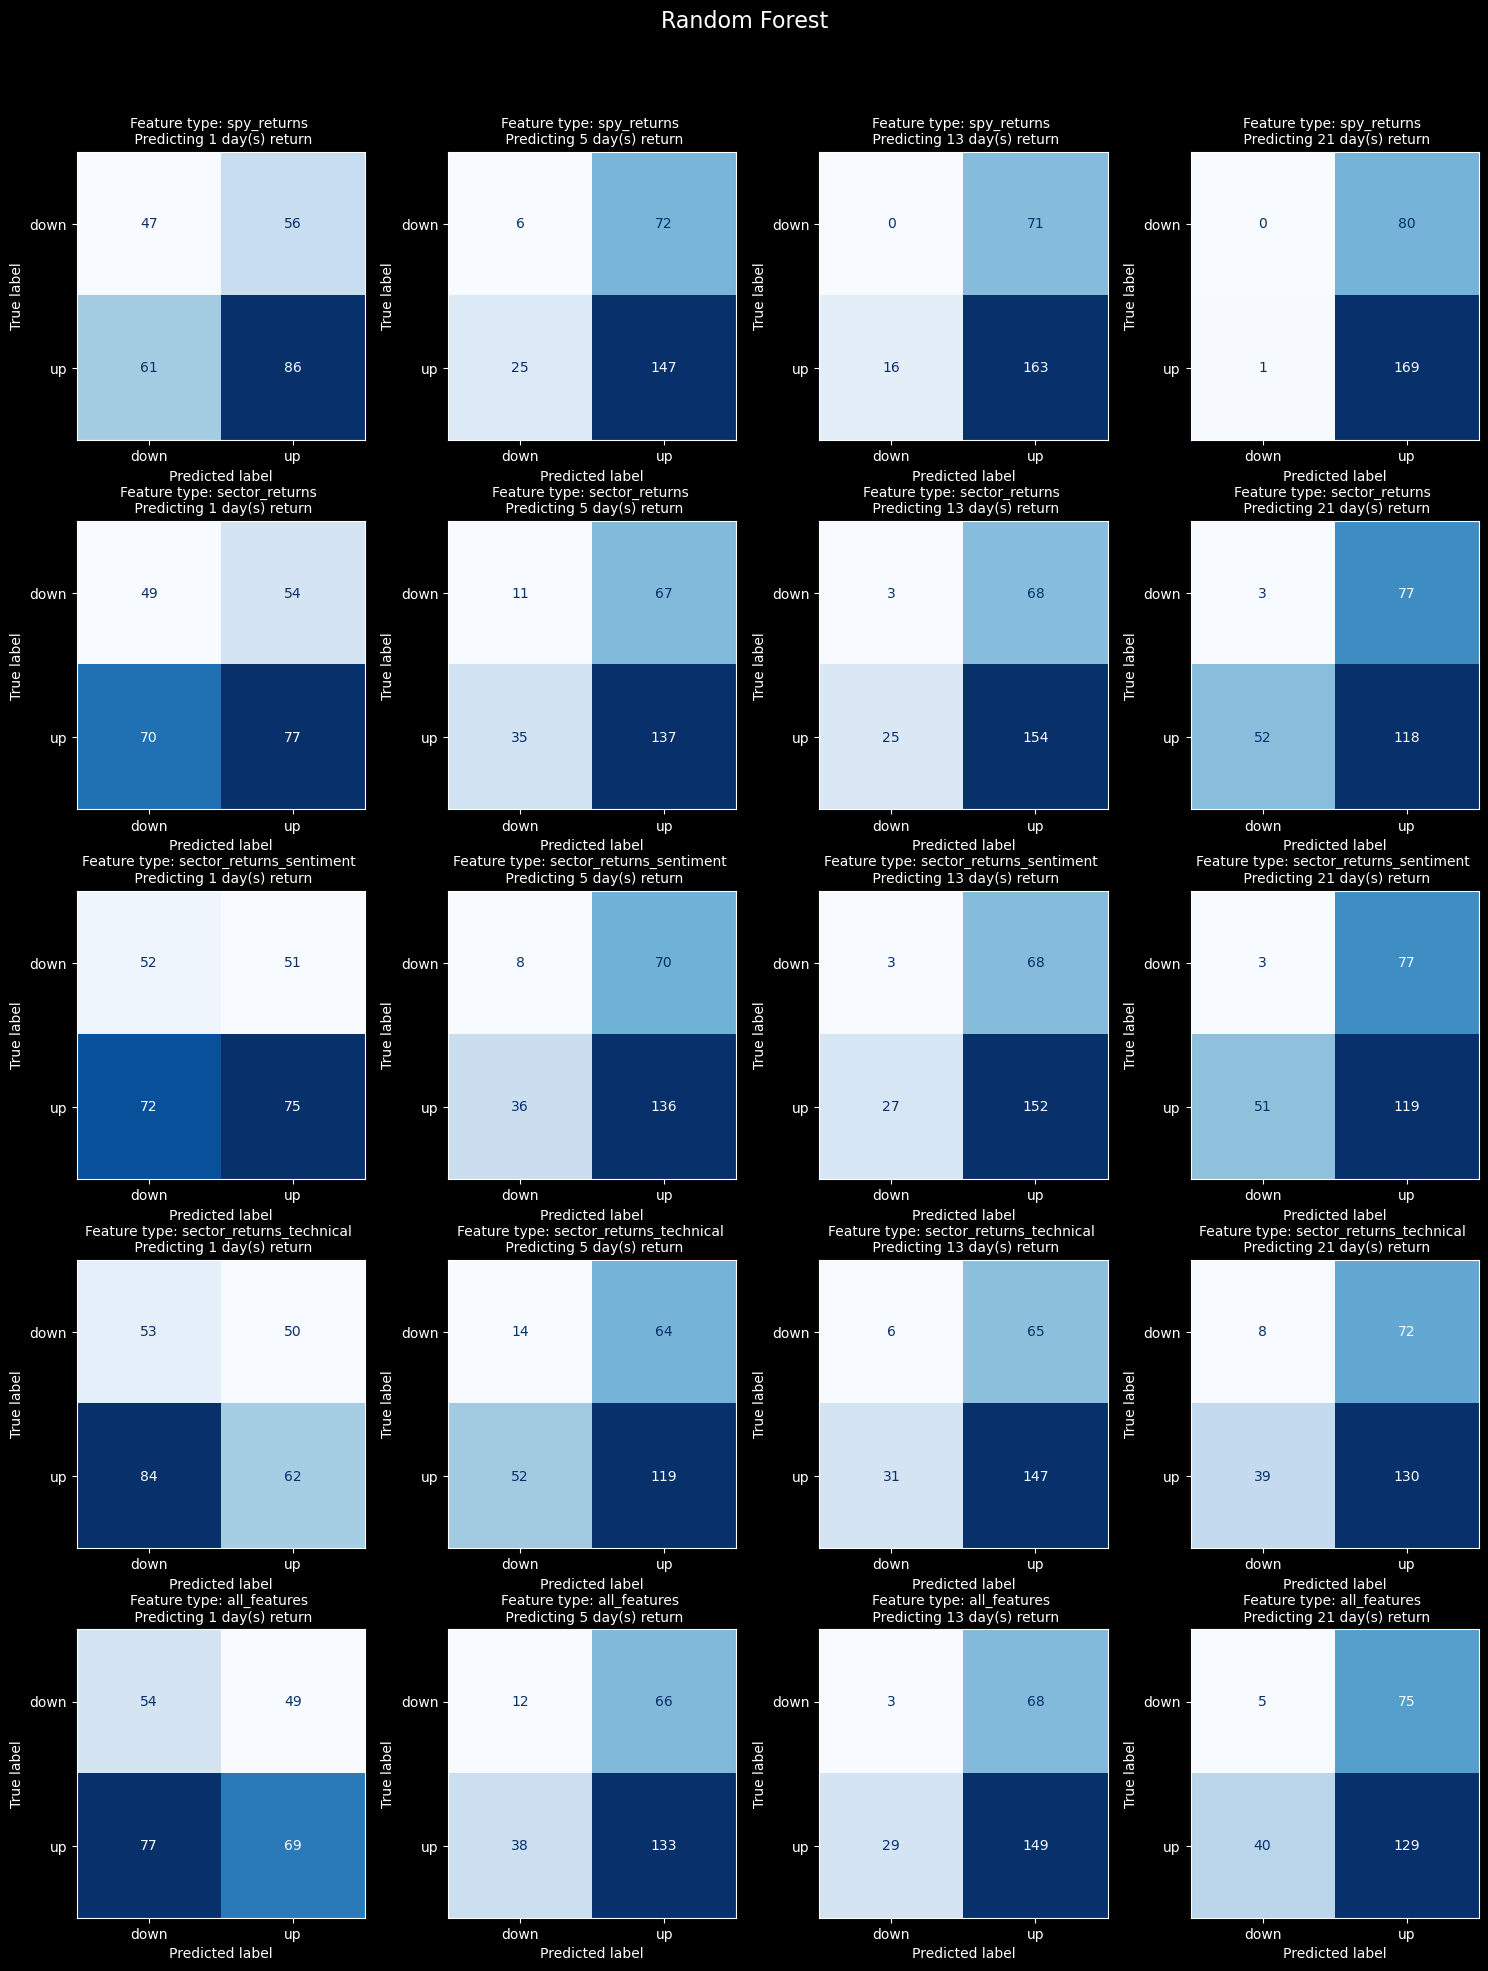

In [26]:
plot_all_confusion_matrices(models_key["random_forest"], "Random Forest")

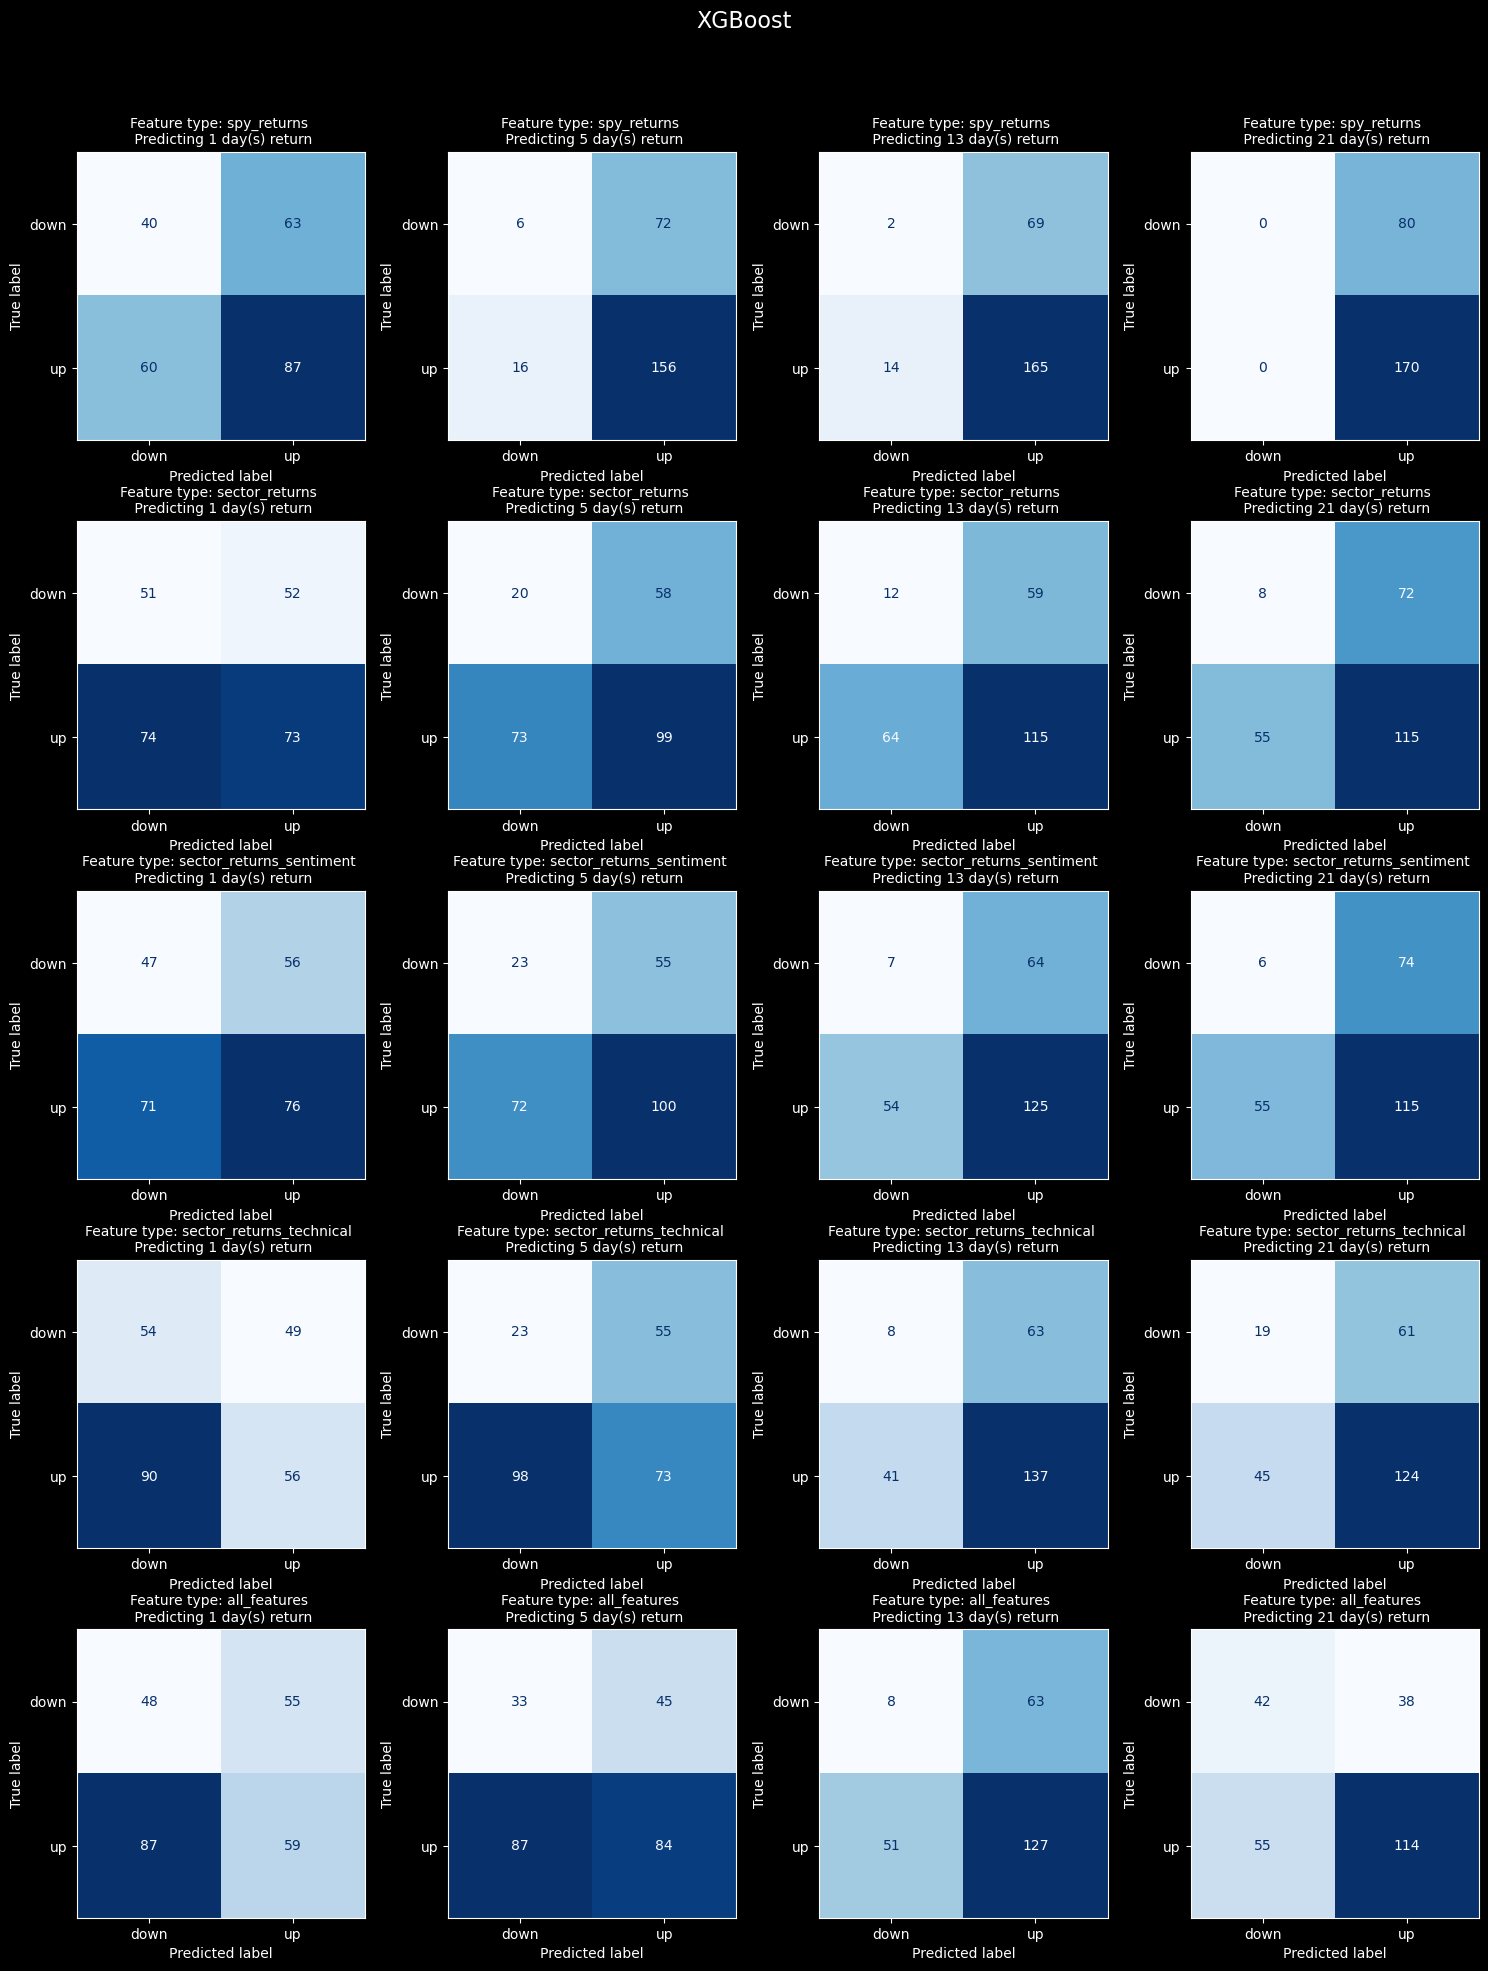

In [27]:
plot_all_confusion_matrices(models_key["xgboost"], "XGBoost")